<a href="https://colab.research.google.com/github/hkronald/5001_A1/blob/main/5001_A1_Final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9413294932380408


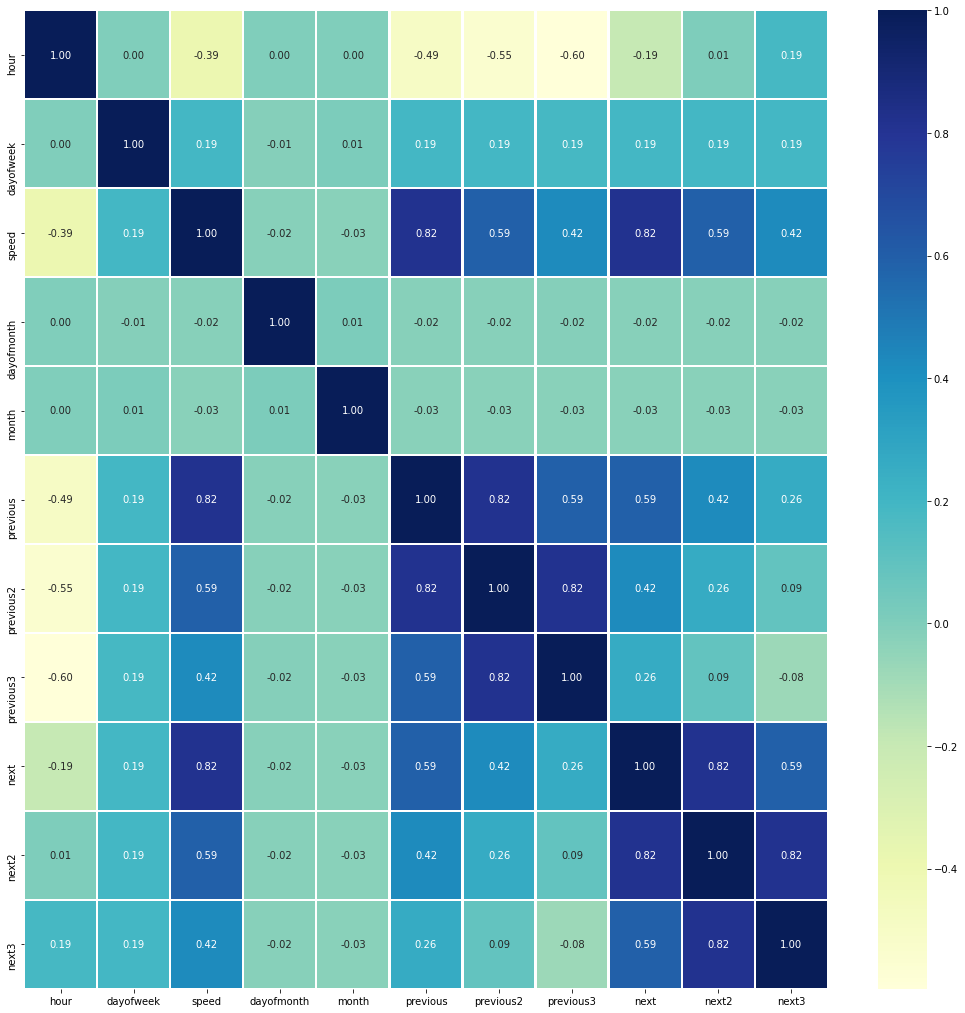

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns   
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from datetime import datetime, timedelta
  

# Function to create more features
def create_features(df, df3, label=None):
       
    df['dayofweek'] = df['date'].dt.dayofweek # day of week
    df['hour'] = df['date'].dt.hour # hour of the day
    df['month'] = df['date'].dt.month # month
    df['year'] = df['date'].dt.year # year
    df['dayofmonth'] = df['date'].dt.day # day of month
    df['previous'] = 0 # previous hour speed
    df['previous2'] = 0 # previous 2 hours speed
    df['previous3'] = 0 # previous 3 hours speed
    df['next'] = 0 # next hour speed 
    df['next2'] = 0 # next 2 hours speed
    df['next3'] = 0 # next 3 hours speed
       
    i = 0

    # Add more feature value to each row
    while i < len(df):

      if label:
        # add previous hours speed for training data
        if i > 2:
          df.at[i,'previous'] = df.loc[i - 1].at['speed']
          df.at[i,'previous2'] = df.loc[i - 2].at['speed']
          df.at[i,'previous3'] = df.loc[i - 3].at['speed']
        elif i == 2:
          df.at[i,'previous'] = df.loc[i - 1].at['speed']
          df.at[i,'previous2'] = df.loc[i - 2].at['speed']
        elif i == 1:
          df.at[i,'previous'] = df.loc[i - 1].at['speed']

        # add next hours speed for training data
        if (i < (len(df) - 3)):
          df.at[i,'next'] = df.loc[i + 1].at['speed']
          df.at[i,'next2'] = df.loc[i + 2].at['speed']
          df.at[i,'next3'] = df.loc[i + 3].at['speed']
        elif (i == (len(df) - 3)):
          df.at[i,'next'] = df.loc[i + 1].at['speed']
          df.at[i,'next2'] = df.loc[i + 2].at['speed']
        elif (i == (len(df) - 2)):
          df.at[i,'next'] = df.loc[i + 1].at['speed']

        
      else:
        # add previous hours speed for testing data
        m = len(df3.loc[df3['date'] < df.loc[i].at['date']])
        df.at[i,'previous'] = df3.loc[m-1].at['speed']
        df.at[i,'previous2'] = df3.loc[m-2].at['speed']
        df.at[i,'previous3'] = df3.loc[m-3].at['speed']

        # add next hours speed for testing data
        if m < (len(df3) - 2):
          df.at[i,'next'] = df3.loc[m].at['speed']
          df.at[i,'next2'] = df3.loc[m+1].at['speed']
          df.at[i,'next3'] = df3.loc[m+2].at['speed']
        elif m == (len(df3) - 2):
          df.at[i,'next'] = df3.loc[m].at['speed']
          df.at[i,'next2'] = df3.loc[m+1].at['speed']  
        elif m == (len(df3) - 1):
          df.at[i,'next'] = df3.loc[m].at['speed']

      i += 1

    # return the feature value
    if label:    
      X = df[['hour','dayofweek','speed','date','dayofmonth','month','previous','previous2','previous3','next','next2','next3']]
      return X
    
    return df[['hour','dayofweek','date','dayofmonth','month','previous','previous2','previous3','next','next2','next3']]


#################################################################################

# Read training data
df = pd.read_csv("train.csv")

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Create necessary features
X = create_features(df, df, label='speed')

# Make a copy of the dataframe
features_and_target = X.copy()

# Draw the correlation map
corr_info = features_and_target.corr()
fig,ax = plt.subplots(figsize = (18,18))
ax = sns.heatmap(corr_info,
                 annot=True,
                 linewidths=1.2,
                 fmt=".2f",
                 cmap="YlGnBu");

# Speed data
y = features_and_target['speed']

# Drop unnecessary features
useless = ['date']
x = features_and_target.drop(['speed'] + useless, axis = 1)

# Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Use random forest regressor model
random_forest_reg = RandomForestRegressor(n_estimators = 2000)
random_forest_reg.fit(x_train, y_train)
random_forest_score = random_forest_reg.score(x_test, y_test)


# Read testing data
df_test = pd.read_csv("test.csv")

df_test['date'] = pd.to_datetime(df_test['date'], dayfirst=True)

df_test = df_test.drop(['id'], axis=1)

df_test.set_index('date')

# create features for the testing data
X = create_features(df_test, df)

features_and_target = X.copy()

useless = ['date']

# Drop unnecessary features
x = features_and_target.drop(useless, axis = 1)

# Run the prediction of the result
random_forest_reg_pred = random_forest_reg.predict(x)

# Write the result to sampleSubmission.csv
df_temp = pd.DataFrame(random_forest_reg_pred)
df_temp.to_csv('sampleSubmission.csv',index=True,header=["speed"],index_label='id')

